<a href="https://colab.research.google.com/github/mgskko/Machine-Learning/blob/main/matplotlib%EA%B3%BC_seaborn_%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC%EB%A5%BC_%ED%99%9C%EC%9A%A9%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
plt.rcParams['figure.figsize'] = [10,8]
sns.set(style='whitegrid')
sns.set_palette('pastel')
warnings.filterwarnings('ignore')

In [ ]:
# % 한글이 깨지는 경우 %
from matplotlib import font_manager, rc
import matplotlib
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False 

In [ ]:
# Loading 'Tips' dataset from seaborn
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.shape

(244, 7)

In [ ]:
#matplotlib  을 활용한 시각화

In [ ]:
sum_tip_by_day = tips.groupby('day')['tip'].sum()
sum_tip_by_day

day
Thur    171.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [ ]:
 x_label = ['Thu','Fri','Sat','Sun']
 x_label_index = np.arange(len(x_label))
 x_label_index

array([0, 1, 2, 3])

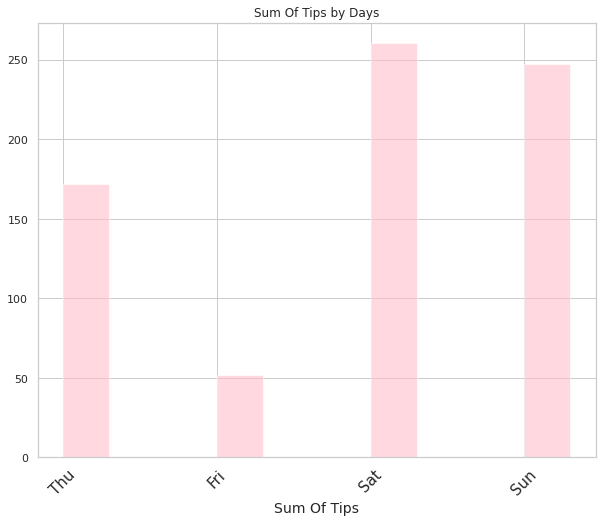

In [ ]:
# Bar 차트 이해 및 제작
plt.bar(x_label,sum_tip_by_day,
        color='pink',
    alpha=0.6,width=0.3,align='edge')
plt.title('Sum Of Tips by Days')
plt.xlabel('Days', fontsize=14)
plt.xlabel('Sum Of Tips', fontsize=14)
plt.xticks(x_label_index,
           x_label,
           rotation=45,
           fontsize=15)
plt.show()

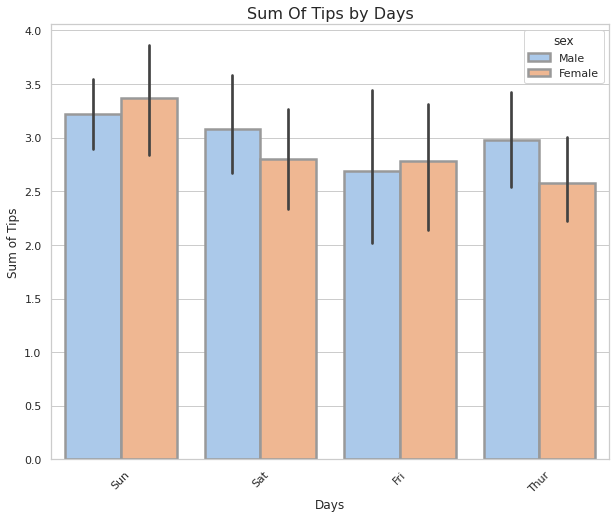

In [ ]:
# seaborn을 활용한 시각화
sns.barplot(data = tips, # 데이터 프레임
            x='day', # x 변수
            y='tip', # y 변수ns.barplot(data = tips, # 데이터 프레임
            hue='sex', # 특정 컬럼값을 기준으로 나눠서 보고 싶을 때
            estimator = np.average,
            palette='pastel', # pastel, husl, Set2, flare, Blues_d
            order=['Sun','Sat','Fri','Thur'], # x 변수 순서 지정
            edgecolor=".6", # edge 선명도 지정
            linewidth=2.5 # line두께 지정
            )
plt.title('Sum Of Tips by Days', fontsize=16)
plt.xlabel('Days')
plt.ylabel('Sum of Tips')
plt.xticks(rotation=45)
plt.show() 

In [ ]:
#Pie 차트 이해 및 제작
# matplotlob을 활용한 시각화
sum_tip_by_day = tips.groupby('day')['tip'].sum()
ratio_sum_tip_by_day = sum_tip_by_day/sum_tip_by_day.sum()
ratio_sum_tip_by_day

day
Thur    0.234875
Fri     0.071024
Sat     0.355942
Sun     0.338159
Name: tip, dtype: float64

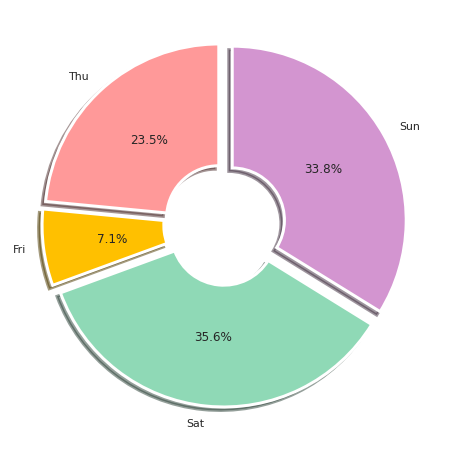

In [ ]:
x_label = ['Thu', 'Fri', 'Sat','Sun']

plt.pie(ratio_sum_tip_by_day, # 비율 값
        labels=x_label, # 라벨 값
        autopct='%.1f%%', # 부채꼴 안에 표시될 숫자 형식(소수점 1자리까지 표시)
        startangle=90, # 축이 시작되는 각도 설정
        counterclock=True, # True: 시계방향순 , False:반시계방향순
        explode=[0.05,0.05,0.05,0.05], # 중심에서 벗어나는 정도 표시
        shadow=True, # 그림자 표시 여부
        colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], # colors=['gold','silver','whitesmoke','gray']
        wedgeprops = {'width':0.7,'edgecolor':'w','linewidth':3}
        )
plt.show()

In [ ]:
#Line 차트 이해 및 제작

# matplotlib을 활용해서 시각화

# line 차트 예제를 위해, tips 데이터에 가상 시간 컬럼 추가하기
# 일요일 데이터만 사용
sun_tips = tips[tips['day'] == 'Sun']
sun_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


In [ ]:
# 현재 서버 시간을 얻기 위해 datetime 라이브러리 사용

import datetime
date = []
today = datetime.date.today()
date.append(today) 
for time in range(sun_tips.shape[0] - 1) : 
  today += datetime.timedelta(1)
  date.append(today)

In [ ]:
sun_tips['date'] = date
sun_tips

,total_bill,tip,sex,smoker,day,time,size,date
0,16.99,1.01,Female,No,Sun,Dinner,2,2022-07-24
1,10.34,1.66,Male,No,Sun,Dinner,3,2022-07-25
2,21.01,3.50,Male,No,Sun,Dinner,3,2022-07-26
3,23.68,3.31,Male,No,Sun,Dinner,2,2022-07-27
4,24.59,3.61,Female,No,Sun,Dinner,4,2022-07-28
...,...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3,2022-10-03
187,30.46,2.00,Male,Yes,Sun,Dinner,5,2022-10-04
188,18.15,3.50,Female,Yes,Sun,Dinner,3,2022-10-05
189,23.10,4.00,Male,Yes,Sun,Dinner,3,2022-10-06


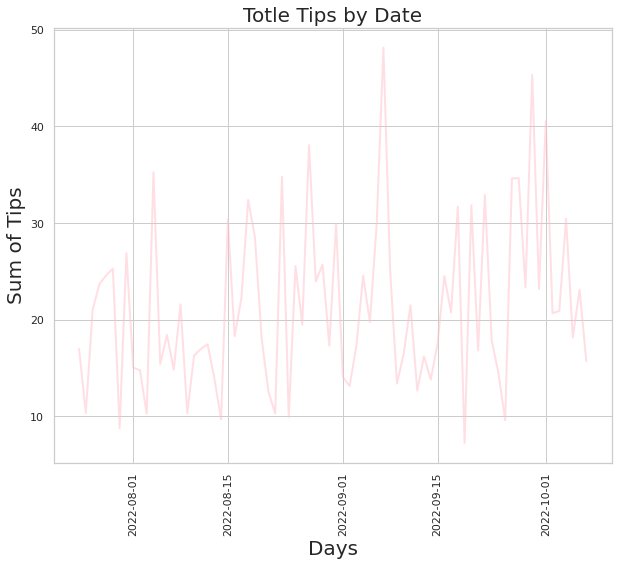

In [ ]:
# line chart

plt.plot(sun_tips['date'],sun_tips['total_bill'],
         linestyle = '-',
         linewidth = 2,
         color = 'pink',
         alpha = 0.5)
plt.title('Totle Tips by Date',fontsize=20)
plt.xlabel('Days',fontsize=20)
plt.ylabel('Sum of Tips',fontsize=20)
plt.xticks(rotation=90)
plt.show()

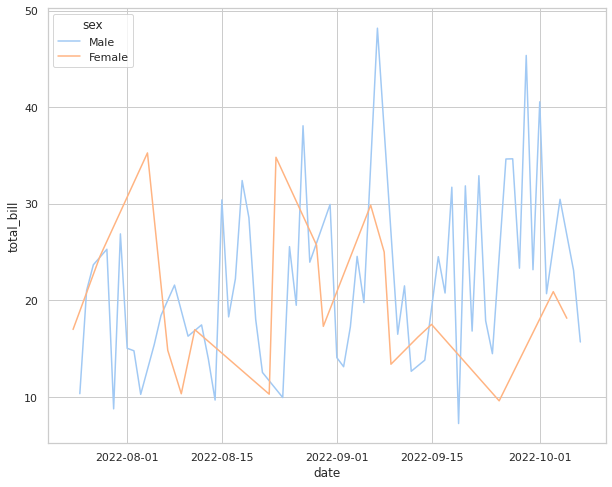

In [ ]:
# seaborn을 활용한 시각화
sns.lineplot(data = sun_tips,
             x = 'date',
             y = 'total_bill',
             hue = 'sex')
plt.show()

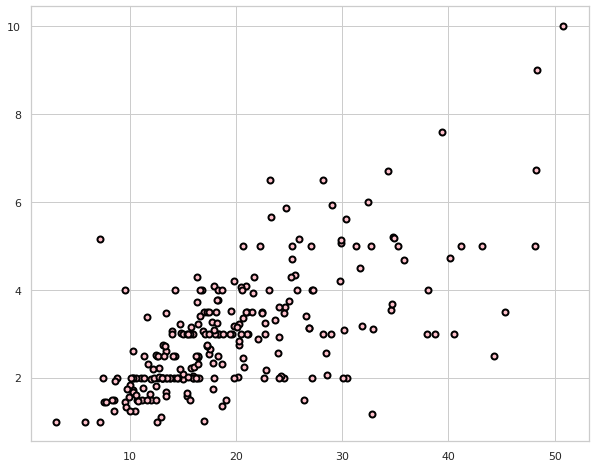

In [ ]:
# Scatter 차트 이해 및 제작

# matplotlib을 활용한 시각화
plt.scatter(tips['total_bill'], tips['tip'],
            color = 'pink',
            edgecolor = 'black',
            linewidth = 2)
plt.show()

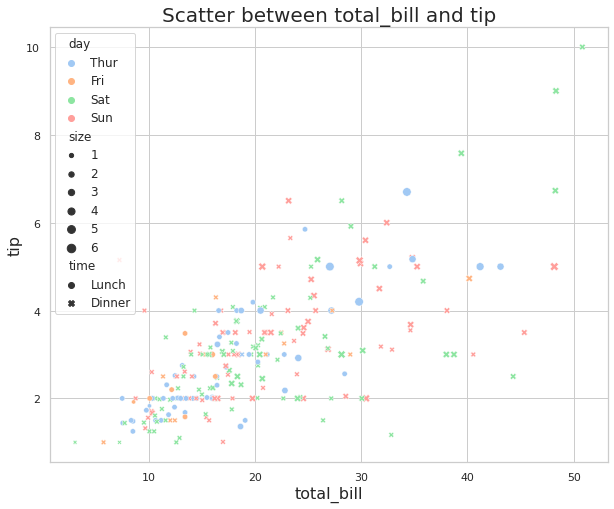

In [ ]:
# seaborn을 활용한 시각화
sns.scatterplot(data = tips,
                x = 'total_bill',
                y = 'tip',
                style = 'time', # 모양 구분으로 다른 변수량 비교
                hue = 'day',   # 색깔 구분으로 다른 변수량 비교
                size = 'size', # 크기 구분으로 다른 변수량 비교
                )
plt.title('Scatter between total_bill and tip',fontsize=20)
plt.xlabel('total_bill',fontsize=16)
plt.ylabel('tip',fontsize=16)
plt.show()

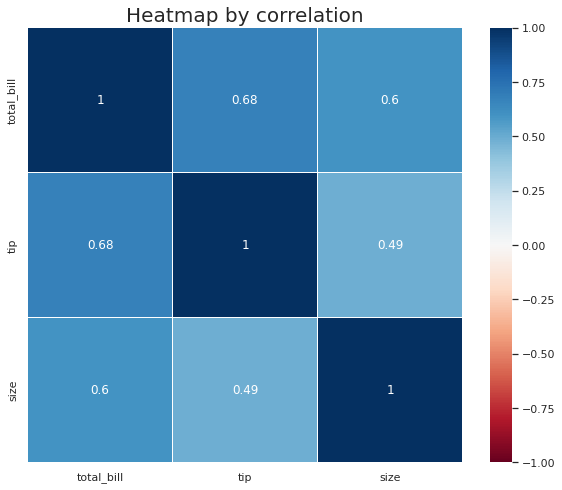

In [ ]:
# Heat Map 차트 이해 및 제작
# seaborn을 활용한 시각화
sns.heatmap(tips.corr(),
            annot = True,
            square = True,
            vmin = -1,vmax = 1,
            linewidth = .5,
            cmap = 'RdBu')
plt.title('Heatmap by correlation',fontsize=20)
plt.show()

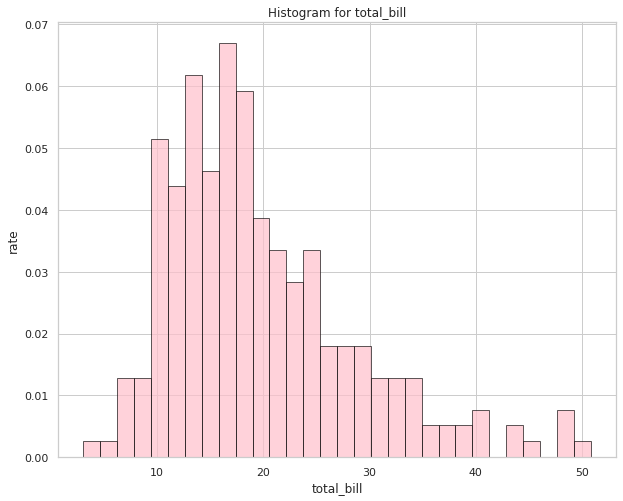

In [ ]:
# Histogram 차트 이해 및 제작
# matplotlib을 활용한 시각화

plt.hist(tips['total_bill'],
         bins = 30,
         density = True,
         alpha = 0.7,
         color = 'pink',
         edgecolor = 'black',
         linewidth = 0.9)
plt.title('Histogram for total_bill')
plt.xlabel('total_bill')
plt.ylabel('rate')
plt.show()

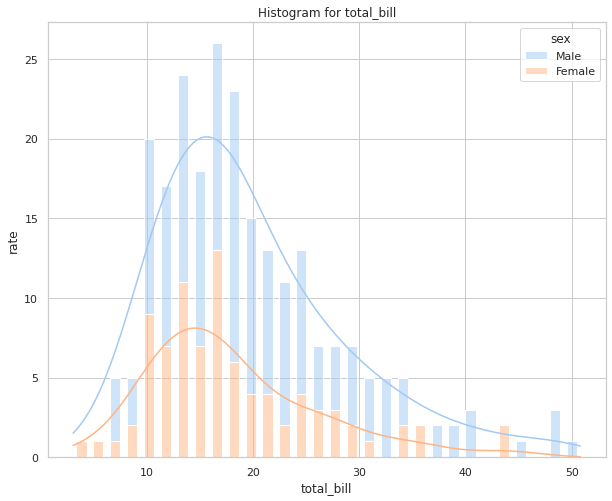

In [ ]:
# seaborn을 활용한 시각화

sns.histplot(data = tips,
             x = 'total_bill',
             bins = 30,
             kde = True,
             hue = 'sex',
             multiple = 'stack',
             shrink = 0.6)
plt.title('Histogram for total_bill')
plt.xlabel('total_bill')
plt.ylabel('rate')
plt.show()

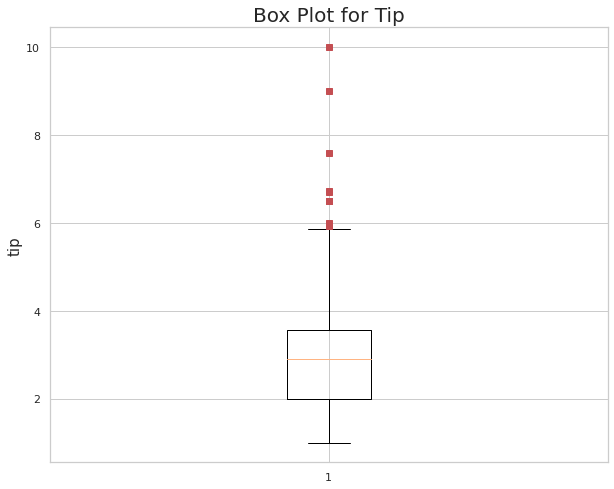

In [ ]:
# Box 차트 이해 및 제작

# matplotlib을 활용한 시각화
plt.boxplot(tips['tip'],
            sym='rs')
plt.title('Box Plot for Tip',fontsize=20)
plt.ylabel('tip',fontsize=15)
plt.show()

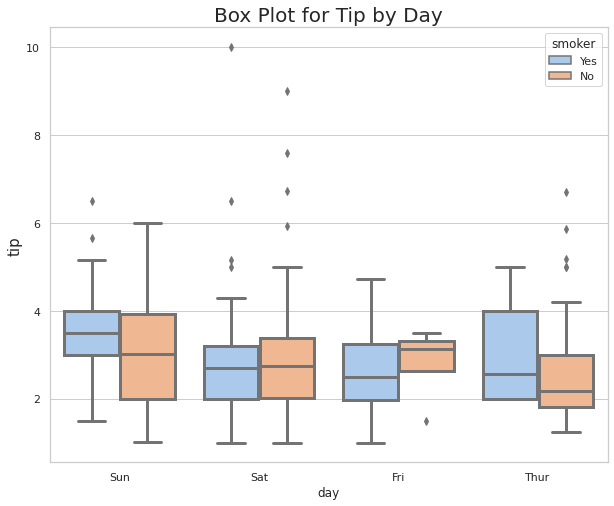

In [ ]:
# sns을 활용한 시각화
sns.boxplot(data = tips,
            x = 'day',
            y = 'tip',
            hue = 'smoker',
            palette='pastel',
            linewidth=3,
            order=["Sun", "Sat","Fri","Thur"])
plt.title('Box Plot for Tip by Day',fontsize=20)
plt.ylabel('tip',fontsize=15)
plt.show()